In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
# importing and reading the dataset
bike_days_df = pd.read_csv("day.csv")

In [4]:
# Check the dataset
bike_days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### We are going to drop the columns 'instant', 'dteday', 'casual' and 'registered' as they will not play any role in the regression model

In [5]:
bike_days_df.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True)

In [6]:
# Check the dataset now after dropping the above columns
bike_days_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

### We will be doing some exploratory data analysis to see if we can come across some patterns that might influence the dependent variable

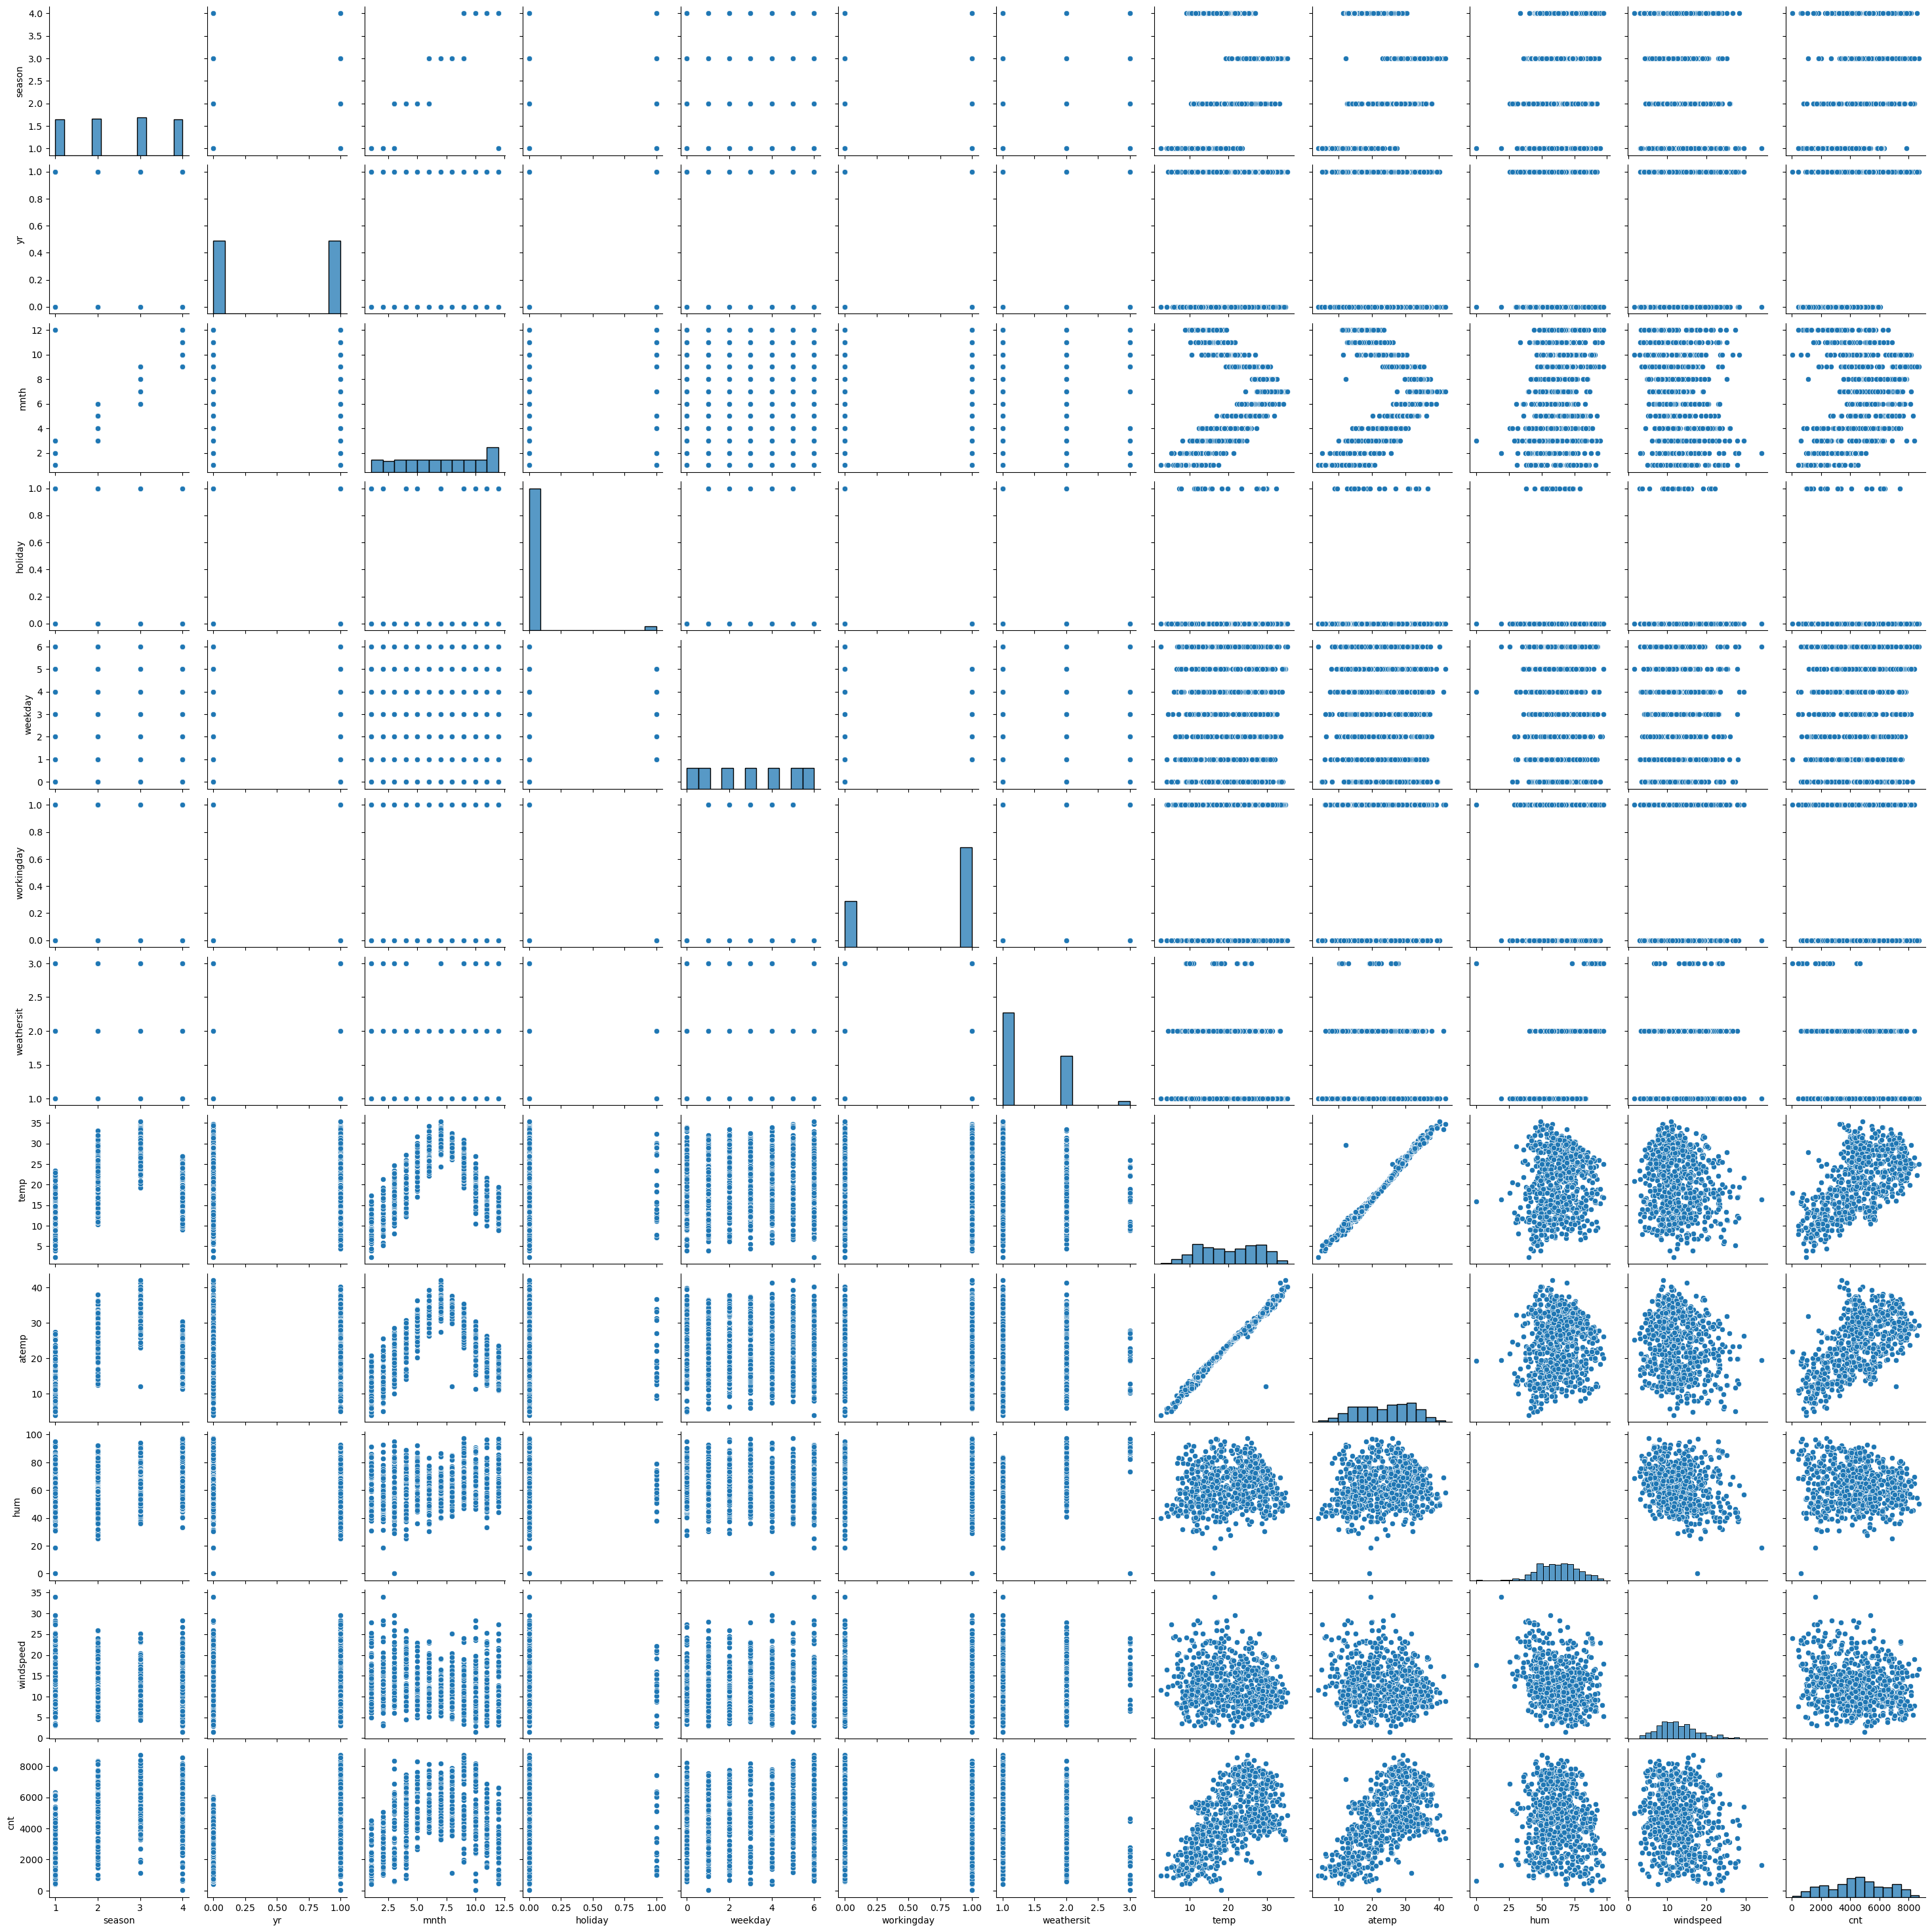

In [8]:
# Create a pairplot for all the variables
sns.pairplot(bike_days_df)
plt.show()

### We can see from the above pairplot that `mnth`, `season`, `yr`, `holiday`, `weathersit`, `temp` and `atemp` wield considerable influence on the dependent variable which is `cnt`

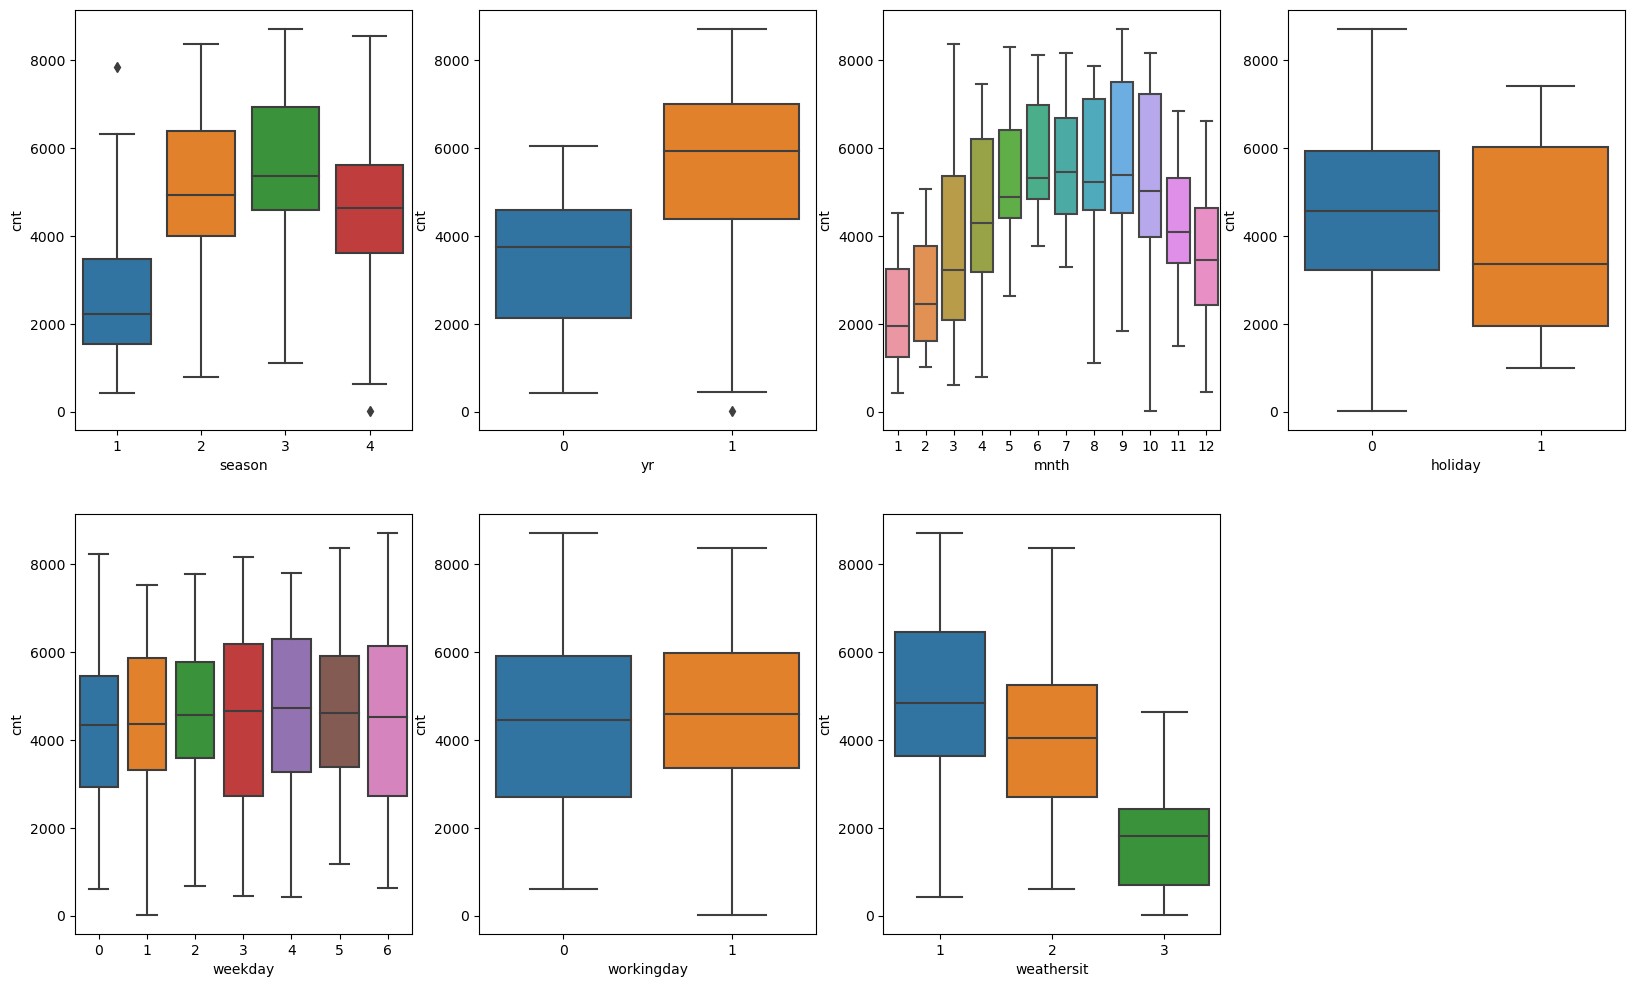

In [9]:
# We will now set up box plots for the categorical variables that we see
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_days_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_days_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_days_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_days_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_days_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_days_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_days_df)
plt.show()

### As we can see above, among the variables `weathersit`, `season`, `yr`, `mnth` and `holiday` have a significant impact on the dependent variable `cnt`

### We will be needing to convert the categorical variables above i.e. `season`, `mnth`, `weekday`, and `weathersit` into dummy variables

#### We are now converting the `season` variable into dummy variables

In [10]:
# Let's rename the dummy variables as well in order to prevent any confusion with the other categorical variables.
season_dict = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}

In [11]:
season_dummies = pd.get_dummies(bike_days_df['season'])

In [12]:
#rename the columns based on the dictionary
season_dummies.rename(columns=season_dict, inplace=True)

In [13]:
season_dummies.head()

,spring,summer,fall,winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [14]:
#We don't need all the columns, we can drop the first season as we can infer it from the remaining seasons
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

In [15]:
season_dummies.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [16]:
#Let's concatenate the newly found dummy variables
bike_days_df = pd.concat([bike_days_df, season_dummies], axis = 1)

In [17]:
bike_days_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [18]:
#We will drop season as it will not be playing any part anymore
bike_days_df.drop(['season'], axis = 1, inplace = True)

In [19]:
bike_days_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


#### We are now converting the `weathersit` variable into dummy variables

In [20]:
# Let's rename the dummy variables as well in order to prevent any confusion with the other categorical variables.
weather_dict = {1:'clear', 2:'misty', 3:'lightly_snowing', 4:'heavily_raining'}

In [21]:
weather_dummies = pd.get_dummies(bike_days_df['weathersit'])

In [22]:
#rename the columns based on the dictionary
weather_dummies.rename(columns=weather_dict, inplace=True)

In [23]:
weather_dummies.head()

,clear,misty,lightly_snowing
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [24]:
#Let's concatenate the newly found dummy variables
bike_days_df = pd.concat([bike_days_df, weather_dummies], axis = 1)

In [25]:
bike_days_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter,clear,misty,lightly_snowing
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,1,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0


In [26]:
#We will drop weathersit as it will not be playing any part anymore
bike_days_df.drop(['weathersit'], axis = 1, inplace = True)

In [27]:
bike_days_df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,clear,misty,lightly_snowing
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0


#### We are now converting the `weekday` variable into dummy variables

In [28]:
# Let's rename the dummy variables as well in order to prevent any confusion with the other categorical variables.
weekday_dict = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri',5 :'Sat', 6:'Sun'}

In [29]:
weekday_dummies = pd.get_dummies(bike_days_df['weekday'])

In [30]:
weekday_dummies.head()

,0,1,2,3,4,5,6
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


In [31]:
#rename the columns based on the dictionary
weekday_dummies.rename(columns=weekday_dict, inplace=True)

In [32]:
weekday_dummies

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
725,0,0,0,0,1,0,0
726,0,0,0,0,0,1,0
727,0,0,0,0,0,0,1
728,1,0,0,0,0,0,0


In [33]:
#We don't need all the columns, we can drop the first day of the week as we can infer it from the remaining days
weekday_dummies.drop(weekday_dummies.columns[0], axis=1, inplace=True)

In [34]:
weekday_dummies.head()

,Tue,Wed,Thu,Fri,Sat,Sun
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [35]:
#Let's concatenate the newly found dummy variables
bike_days_df = pd.concat([bike_days_df, weekday_dummies], axis = 1)

In [36]:
bike_days_df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,...,winter,clear,misty,lightly_snowing,Tue,Wed,Thu,Fri,Sat,Sun
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,1,0,0,1,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,1,0,0,0,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,1,0,0,0,0,1,0,0,0


In [37]:
#We will drop weekday as it will not be playing any part anymore
bike_days_df.drop(['weekday'], axis = 1, inplace = True)

In [38]:
bike_days_df.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,...,winter,clear,misty,lightly_snowing,Tue,Wed,Thu,Fri,Sat,Sun
0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,1,0,0,0,0,0,0,1
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,1,0,0,1,0,0,0,0,0
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,1,0,0,0,1,0,0,0,0
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,1,0,0,0,0,1,0,0,0


#### We are now converting the `mnth` variable into dummy variables

In [39]:
# Let's rename the dummy variables as well in order to prevent any confusion with the other categorical variables.
month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}

In [40]:
month_dummies = pd.get_dummies(bike_days_df['mnth'])

In [41]:
month_dummies.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [42]:
#rename the columns based on the dictionary
month_dummies.rename(columns=month_dict, inplace=True)

In [43]:
month_dummies.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [44]:
#We don't need all the columns, we can drop the first month as we can infer it from the remaining months
month_dummies.drop(month_dummies.columns[0], axis=1, inplace=True)

In [45]:
month_dummies.head()

,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [46]:
#Let's concatenate the newly found dummy variables
bike_days_df = pd.concat([bike_days_df, month_dummies], axis = 1)

In [47]:
bike_days_df.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,...,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#We will drop mnth as it will not be playing any part anymore
bike_days_df.drop(['mnth'], axis = 1, inplace = True)

In [49]:
bike_days_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


### Now that the binary variables are as is and the dummy variables have been taken care of, we now go ahead and split the data into training and testing sets. We will be going with the 70:30 split

In [50]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(bike_days_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### As we know that scaling will not impact the model, and that it is important to rescale all values so that any of them will not skew the model

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()

In [53]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [54]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
653,1,0,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1796,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,1,0,...,0,1,0,0,0,0,0,0,0,0


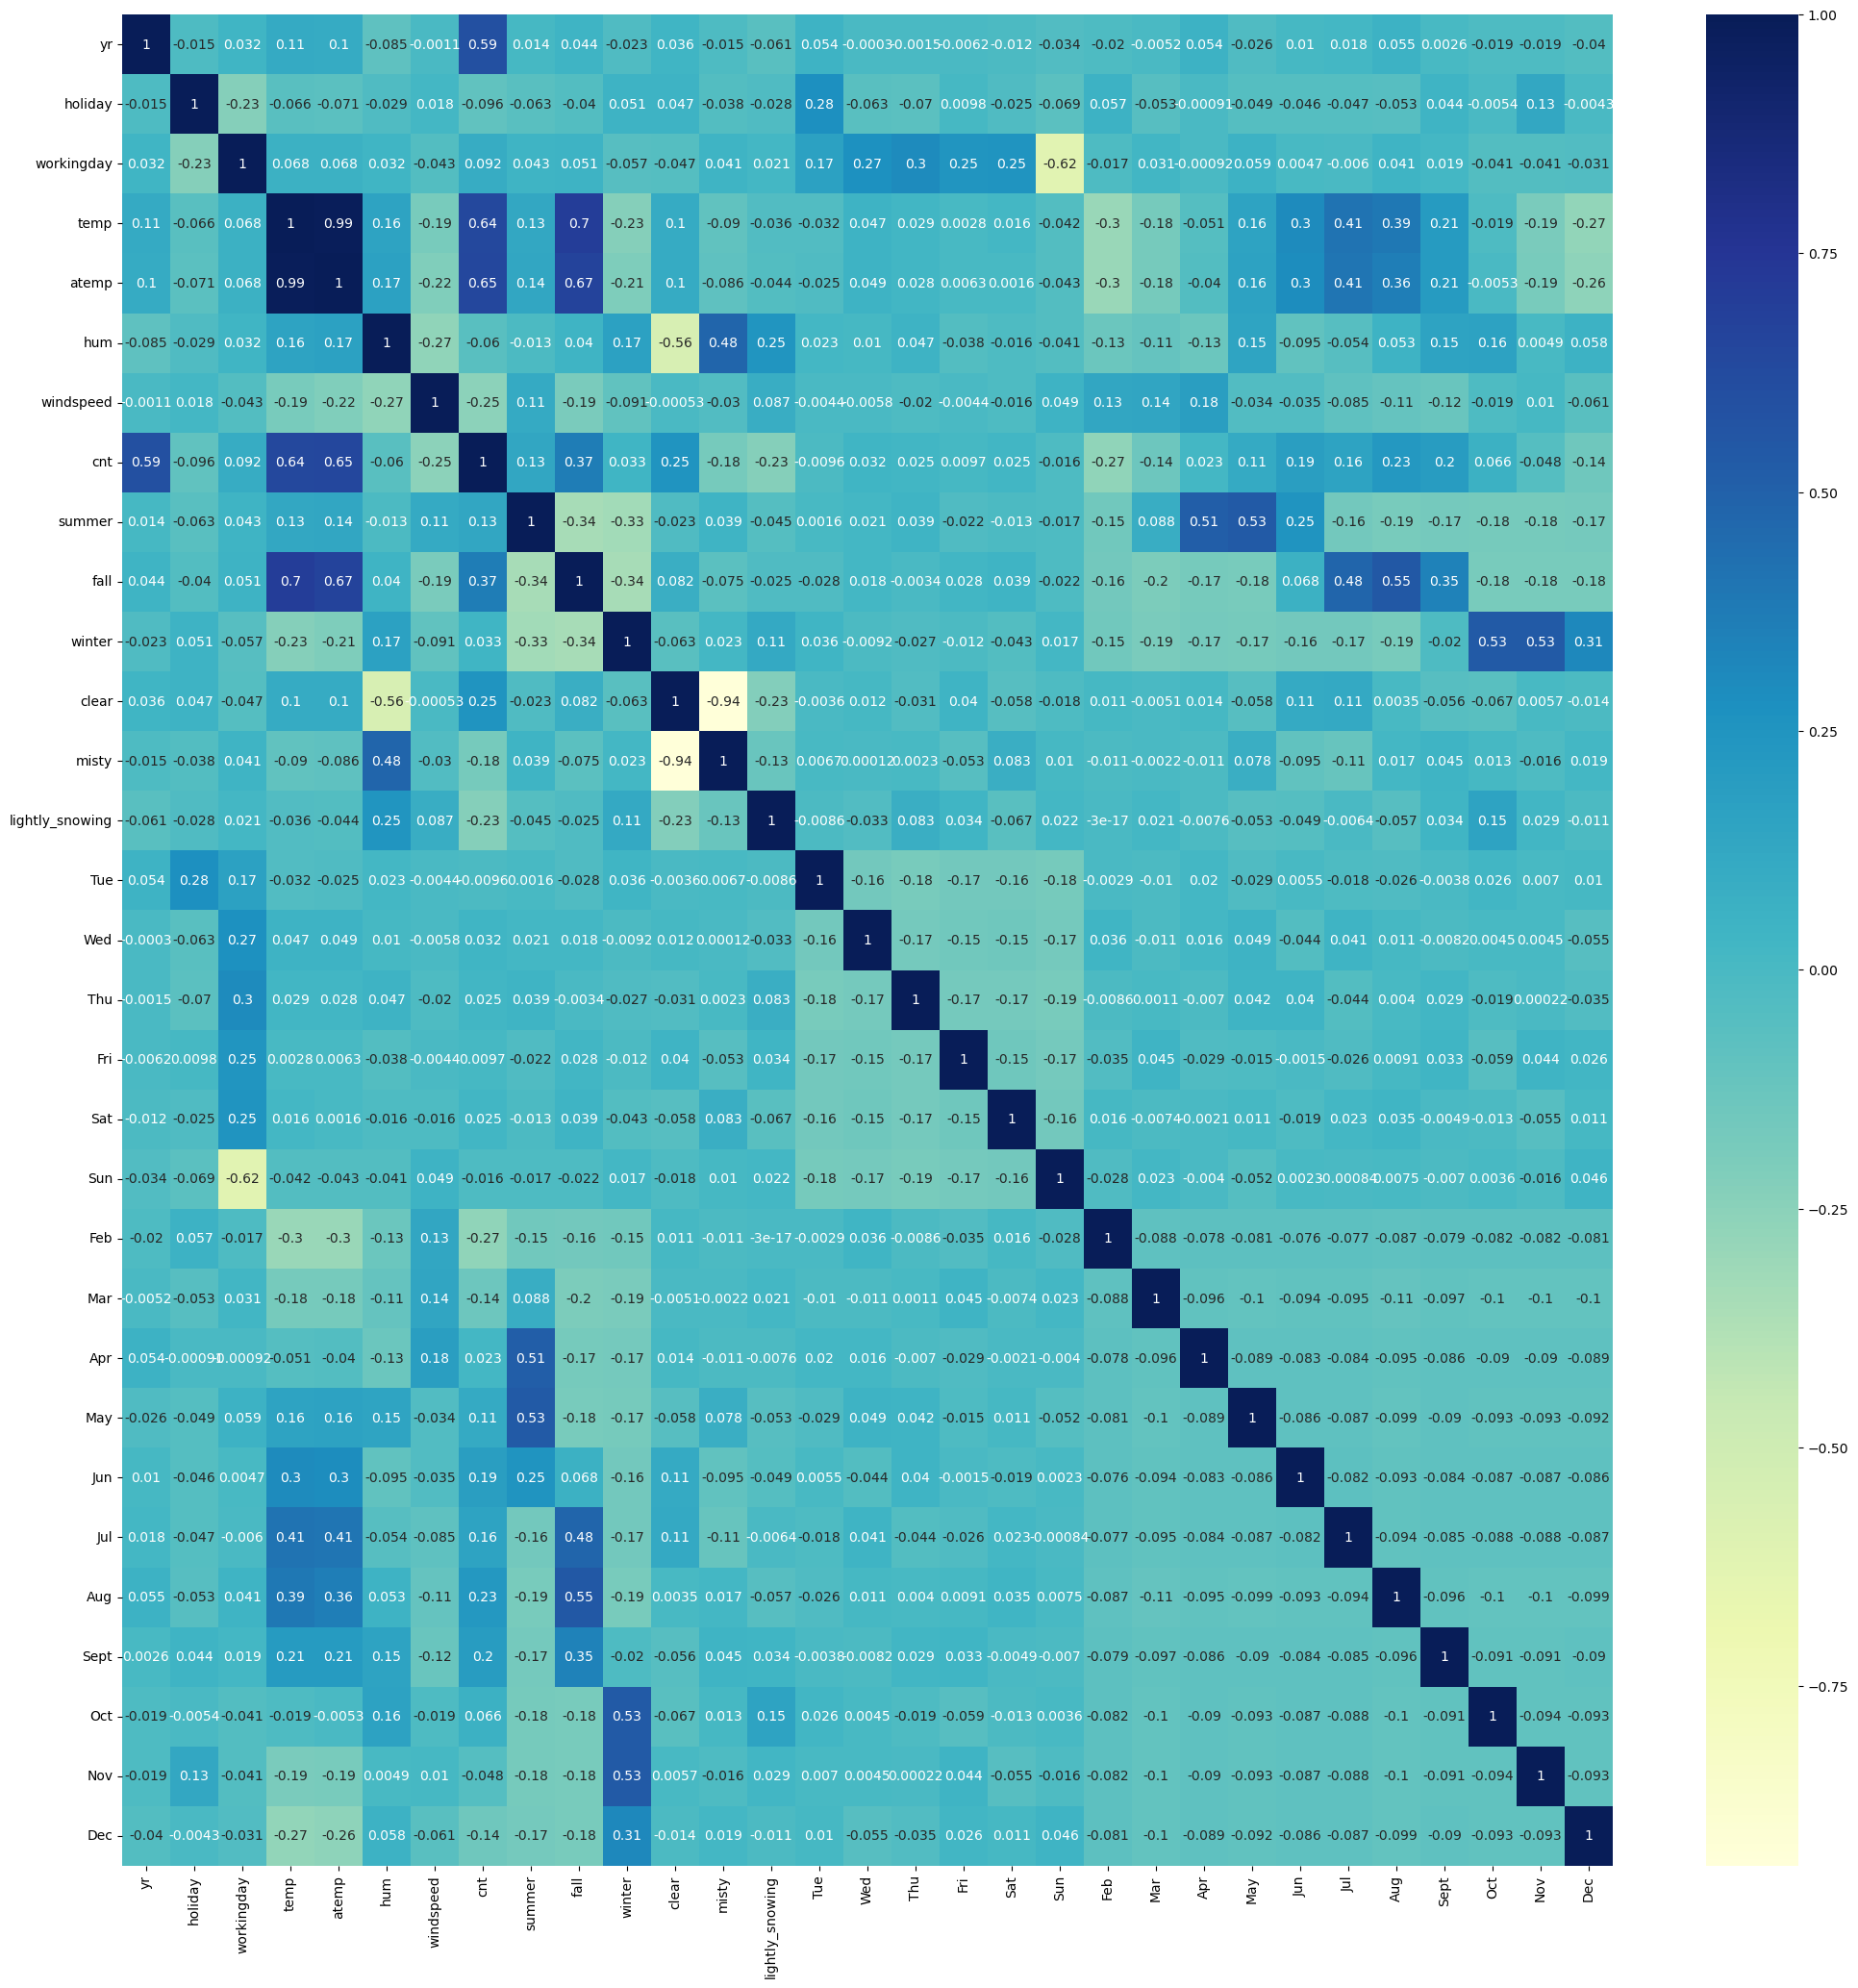

In [55]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### From the above, we see that `yr`, `temp`, `atemp` have the highest correlation with the `cnt` variable. the dummy variables `fall` and `clear` seem to be having moderate correlation, while the months `jun`, `jul`, `aug` and `sept` make up the group that have a slightly higher correlation.

### We now divide X and Y variables for the model building

In [56]:
y_train = df_train.pop('cnt')
X_train = df_train

## Model Building

### We will be using Scikit Learn along with RFE in order to select features that have a significant impact on the dependent variable

In [57]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [58]:
# Let's run RFE with the with an arbitrary number of 18 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=18)
rfe = rfe.fit(X_train, y_train)

In [59]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('clear', True, 1),
 ('misty', True, 1),
 ('lightly_snowing', True, 1),
 ('Tue', False, 9),
 ('Wed', False, 10),
 ('Thu', False, 12),
 ('Fri', False, 13),
 ('Sat', False, 11),
 ('Sun', True, 1),
 ('Feb', False, 5),
 ('Mar', True, 1),
 ('Apr', False, 2),
 ('May', True, 1),
 ('Jun', False, 3),
 ('Jul', False, 6),
 ('Aug', True, 1),
 ('Sept', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 7),
 ('Dec', False, 8)]

In [60]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'clear', 'misty', 'lightly_snowing', 'Sun', 'Mar',
       'May', 'Aug', 'Sept', 'Oct'],
      dtype='object')

In [61]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Feb', 'Apr', 'Jun', 'Jul',
       'Nov', 'Dec'],
      dtype='object')

### Let's build the model using statsmodel for detailed statistics

In [62]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [63]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [64]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [65]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.8
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.51e-190
Time:                        22:30:11   Log-Likelihood:                -4102.4
No. Observations:                 510   AIC:                             8241.
Df Residuals:                     492   BIC:                             8317.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             605.4310    221.978     

#### We will remove `May` it is insignificant compared to other variables. This is taking into consideration the cut-off alpha value of 0.05

In [66]:
X_train_new = X_train_rfe.drop(["May"], axis = 1)

### Let's rebuild the model without the newly dropped variable

In [67]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [68]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [69]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.2
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          4.93e-191
Time:                        22:30:12   Log-Likelihood:                -4104.0
No. Observations:                 510   AIC:                             8242.
Df Residuals:                     493   BIC:                             8314.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             563.7767    221.108     

#### We will remove `fall` as it is insignificant compared to other variables. This is taking into consideration the cut-off alpha value of 0.05

In [70]:
X_train_new.drop(["fall"], axis=1, inplace=True)

### Let's rebuild the model without the recently removed variable

In [71]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [72]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [73]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.0
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.47e-191
Time:                        22:30:13   Log-Likelihood:                -4105.4
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     494   BIC:                             8311.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             581.3074    221.279     

#### We will remove Mar it is insignificant compared to other variables. This is taking into consideration the cut-off alpha value of 0.05

In [74]:
X_train_new.drop(["Mar"], axis=1, inplace=True)

### Let's rebuild the model without the recently removed variable

In [75]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [76]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [77]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          3.24e-192
Time:                        22:30:14   Log-Likelihood:                -4106.6
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     495   BIC:                             8307.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             617.9842    220.253     

In [78]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [79]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,clear,33.55
9,misty,25.02
10,lightly_snowing,3.69
2,workingday,1.88
4,hum,1.88
11,Sun,1.79
7,winter,1.72
3,temp,1.59
14,Oct,1.49
12,Aug,1.46


#### We will remove `clear` it's their VIF value is beyond the threshold range of `0-5`

In [80]:
X_train_new = X_train_new.drop(['clear'], axis=1)

In [81]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.59
3,temp,10.01
2,workingday,5.05
5,windspeed,3.82
7,winter,2.27
8,misty,2.14
0,yr,2.03
10,Sun,1.90
6,summer,1.83
13,Oct,1.62


#### We will remove `hum` it's their VIF value is beyond the threshold range of 0-5

In [82]:
X_train_new = X_train_new.drop(['hum'], axis=1)

In [83]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.38
2,workingday,4.39
4,windspeed,3.60
0,yr,2.02
6,winter,2.02
5,summer,1.82
9,Sun,1.77
12,Oct,1.62
10,Aug,1.59
7,misty,1.54


#### Even though temp is having a VIF greater then 5 we shall keep it as it may be an influential variable

### Let's do the residual analysis of the trained data

In [84]:
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()

In [85]:
y_train_cnt = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

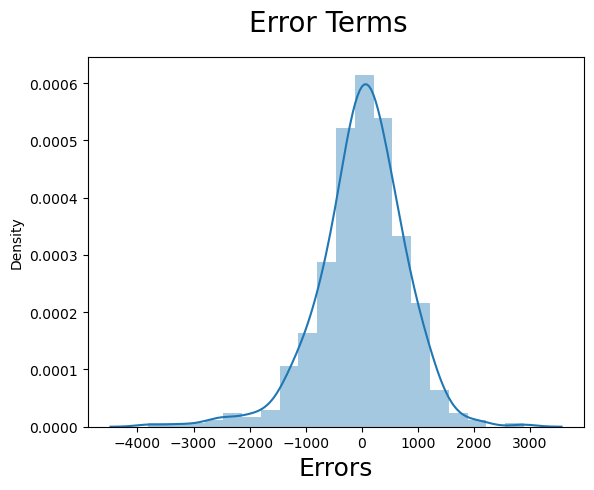

In [86]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

## Making Predictions

### Applying Scaling on the test set

In [87]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

### Dividing into X_test and y_test

In [88]:
y_test = df_test.pop('cnt')
X_test = df_test

In [89]:
X_train_new.drop(['const'], axis=1, inplace=True)

In [90]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [91]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [92]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [93]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8026410728126752

#### We see from the above that the R-Squared value comes to 0.8

Text(0, 0.5, 'y_pred')

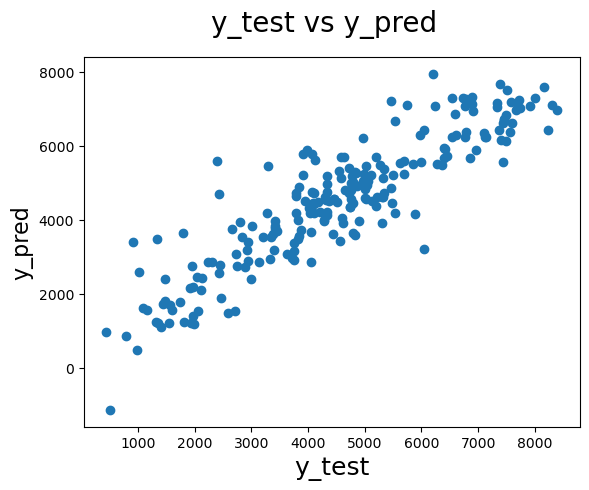

In [94]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 